<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# PCA Lab: Speed Dating

_Authors: Kiefer Katovich (SF)_

---

Let's practice principal component analysis (PCA) using a data set from Kaggle. PCA is often used to simplify data, reduce noise, and find unmeasured latent variables, so it's important to take the time to understand what's going on.

**In this lab, we will:**

- Explore how PCA relates to correlation.
- Use PCA to perform dimensionality reduction.
- Predict whether or not a speed dater likes reading based on the dater's other likes.

---

### Data Set

The data set we're using for this lab is a subset of this [much more detailed speed dating data set](https://www.kaggle.com/annavictoria/speed-dating-experiment). In particular, this contains no information on the actual speed dating itself (i.e., successes with or opinions of other individuals). 

It also contains no follow-up information where individuals are asked the same questions about themselves again. It only contains information about what an individual enjoys doing, their self-ratings on how desirable they are, and how they think others rate them based on desirability.

The columns present in the data are outlined below:

FieldName|Description
---------|-----------
    subject_id                   |   Unique individual identifier.
    wave                         |   Meetup ID.
    like_sports                  |   Enjoyment of participating in sports.
    like_tvsports                |   Enjoyment of watching sports on TV.
    like_exercise                |   Enjoyment of exercise.
    like_food                    |   Enjoyment of food.
    like_museums                 |   Enjoyment of museums.
    like_art                     |   Enjoyment of art.
    like_hiking                  |   Enjoyment of hiking.
    like_gaming                  |   Enjoyment of playing games.
    like_clubbing                |   Enjoyment of going clubbing/partying.
    like_reading                 |   Enjoyment of reading.
    like_tv                      |   Enjoyment of TV in general.
    like_theater                 |   Enjoyment of the theater (plays, musicals, etc.).
    like_movies                  |   Enjoyment of movies.
    like_concerts                |   Enjoyment of concerts.
    like_music                   |   Enjoyment of music.
    like_shopping                |   Enjoyment of shopping.
    like_yoga                    |   Enjoyment of yoga.
    subjective_attractiveness    |   How attractive they rate themselves.
    subjective_sincerity         |   How sincere they rate themselves.
    subjective_intelligence      |   How intelligent they rate themselves.
    subjective_fun               |   How fun they rate themselves.
    subjective_ambition          |   How ambitious they rate themselves.
    objective_attractiveness     |   Perceived rating others would give them on how attractive they are.
    objective_sincerity          |   Perceived rating others would give them on how sincere they are.
    objective_intelligence       |   Perceived rating others would give them on how intelligent they are.
    objective_fun                |   Perceived rating others would give them on how fun they are.
    objective_ambition           |   Perceived rating others would give them on how ambitious they are.
    
There are 551 subjects total.

---

### 1) Load packages.

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score

sns.set_style("whitegrid")

---

### 2) Load and clean the speed dating data.

- First, remove columns with more than 200 missing values.
- Then, remove rows with missing values.
- Verify that no rows contain NaNs.

In [2]:
sd = pd.read_csv('./datasets/speed_dating.csv')

In [3]:
# Check data shape
print(sd.shape)
sd.head()

(551, 29)


,subject_id,wave,like_sports,like_tvsports,like_exercise,like_food,like_museums,like_art,like_hiking,like_gaming,...,subjective_attractiveness,subjective_sincerity,subjective_intelligence,subjective_fun,subjective_ambition,objective_attractiveness,objective_sincerity,objective_intelligence,objective_fun,objective_ambition
0,1,1,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,...,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN
1,2,1,3.0,2.0,7.0,10.0,8.0,6.0,3.0,5.0,...,7.0,5.0,8.0,10.0,3.0,NaN,NaN,NaN,NaN,NaN
2,3,1,3.0,8.0,7.0,8.0,5.0,5.0,8.0,4.0,...,8.0,9.0,9.0,8.0,8.0,NaN,NaN,NaN,NaN,NaN
3,4,1,1.0,1.0,6.0,7.0,6.0,7.0,7.0,5.0,...,7.0,8.0,7.0,9.0,8.0,NaN,NaN,NaN,NaN,NaN
4,5,1,7.0,4.0,7.0,7.0,6.0,8.0,6.0,6.0,...,6.0,3.0,10.0,6.0,8.0,NaN,NaN,NaN,NaN,NaN


In [4]:
# Check missing values
sd.isnull().sum().sort_values(ascending=False)
## There are 4 columns containing more than 200 missing values.
## They start with 'objective' prefix.

objective_ambition           237
objective_fun                237
objective_intelligence       237
objective_sincerity          237
objective_attractiveness     237
subjective_ambition            9
subjective_fun                 9
subjective_intelligence        9
subjective_sincerity           9
subjective_attractiveness      9
like_concerts                  7
like_yoga                      7
like_shopping                  7
like_music                     7
like_movies                    7
like_theater                   7
like_tv                        7
like_reading                   7
like_clubbing                  7
like_gaming                    7
like_hiking                    7
like_art                       7
like_museums                   7
like_food                      7
like_exercise                  7
like_tvsports                  7
like_sports                    7
wave                           0
subject_id                     0
dtype: int64

#### 2.1) First, remove columns with more than 200 missing values.

In [5]:
sd = sd[sd.columns[sd.isnull().sum() <= 200]]

#### 2.2) Then, remove rows with missing values.

In [6]:
# Recheck missing values
sd.isnull().sum().sort_values(ascending=False)

subjective_ambition          9
subjective_fun               9
subjective_intelligence      9
subjective_sincerity         9
subjective_attractiveness    9
like_theater                 7
like_yoga                    7
like_shopping                7
like_music                   7
like_concerts                7
like_movies                  7
like_tv                      7
like_reading                 7
like_clubbing                7
like_gaming                  7
like_hiking                  7
like_art                     7
like_museums                 7
like_food                    7
like_exercise                7
like_tvsports                7
like_sports                  7
wave                         0
subject_id                   0
dtype: int64

In [7]:
# Drop rows that contain missing values
sd = sd.dropna()

#### 2.3) Verify that no rows contain NaNs.

In [8]:
sd.isnull().sum().sort_values(ascending=False).head(5)
## All columns now contain non-missing values.

subject_id                 0
wave                       0
subjective_fun             0
subjective_intelligence    0
subjective_sincerity       0
dtype: int64

In [9]:
# Check data characteristic
sd.describe().T

## Most of attributes' scales might be range 0 - 1

,count,mean,std,min,25%,50%,75%,max
subject_id,542.0,277.442804,159.499319,1.0,141.25,276.5,416.50,552.0
wave,542.0,11.110701,6.018664,1.0,6.25,11.0,15.75,21.0
like_sports,542.0,6.392989,2.629034,1.0,4.25,7.0,8.00,10.0
like_tvsports,542.0,4.555351,2.802112,1.0,2.00,4.0,7.00,10.0
like_exercise,542.0,6.278598,2.450596,1.0,5.00,7.0,8.00,10.0
like_food,542.0,7.780443,1.777282,1.0,7.00,8.0,9.00,10.0
like_museums,542.0,6.985240,2.041113,1.0,6.00,7.0,8.75,10.0
like_art,542.0,6.702952,2.259167,1.0,5.00,7.0,8.00,10.0
like_hiking,542.0,5.758303,2.570750,0.0,4.00,6.0,8.00,10.0
like_gaming,542.0,3.843173,2.612238,0.0,1.25,3.0,6.00,14.0


---

### 3) Example: Are the `subjective` columns correlated?

Here, we'll understand how the `subjective` columns are correlated.

- Find the z scores of each `subjective` column (i.e. standardize the `subjective` columns).
- Visualize correlation using [PairGrid](https://seaborn.pydata.org/generated/seaborn.PairGrid.html).
- Visualize correlation using a heat map.

**3.A) Find the z scores of each column. This allows the columns to more easily be directly compared.**

In [10]:
subjective_cols = [col for col in sd.columns \
                   if col.startswith('subjective')]

sc_subjective_cols = [f'sc_{col}' for col in sd.columns \
                   if col.startswith('subjective')]

# Initiate StandardScaler Object
sc = StandardScaler()

# Fit transform
sd_scale = pd.DataFrame(sc.fit_transform(sd[subjective_cols]),
                        columns=sc_subjective_cols)

In [11]:
# Check result
sd_scale.head()

,sc_subjective_attractiveness,sc_subjective_sincerity,sc_subjective_intelligence,sc_subjective_fun,sc_subjective_ambition
0,-0.786472,-0.202716,-0.354194,0.193323,-0.323589
1,-0.066425,-2.329267,-0.354194,1.486916,-2.564932
2,0.653622,0.506135,0.564338,0.193323,0.236747
3,-0.066425,-0.202716,-1.272726,0.840119,0.236747
4,-0.786472,-3.746968,1.482870,-1.100270,0.236747


**3.B) Use a PairGrid to visualize correlation.**

[`PairGrid`](https://seaborn.pydata.org/generated/seaborn.PairGrid.html) is more general version of `pairplot`.  For example, you could use the following code, where `subjective` is a data frame containing only the subjective columns:

```python
g = sns.PairGrid(subjective)
# Regression plots in lower triangle
g = g.map_lower(sns.regplot) 
g = g.map_upper(sns.kdeplot, cmap="Blues", shade=True, shade_lowest=False)  # KDE plots in upper triangle
g = g.map_diag(plt.hist) # Histograms along diagonal

plt.show()
```

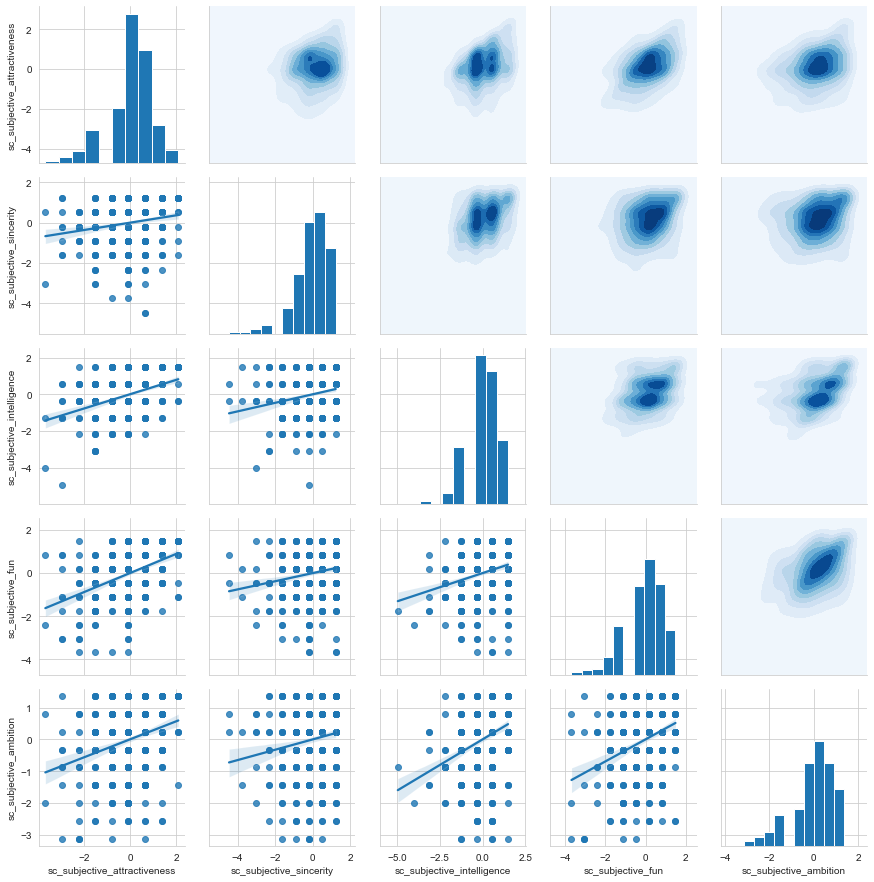

In [12]:
# Plot with scaling
g = sns.PairGrid(sd_scale)
# Regression plots in lower triangle
g = g.map_lower(sns.regplot) 
g = g.map_upper(sns.kdeplot, cmap="Blues", shade=True, thresh=False)  # KDE plots in upper triangle
g = g.map_diag(plt.hist) # Histograms along diagonal

plt.show()

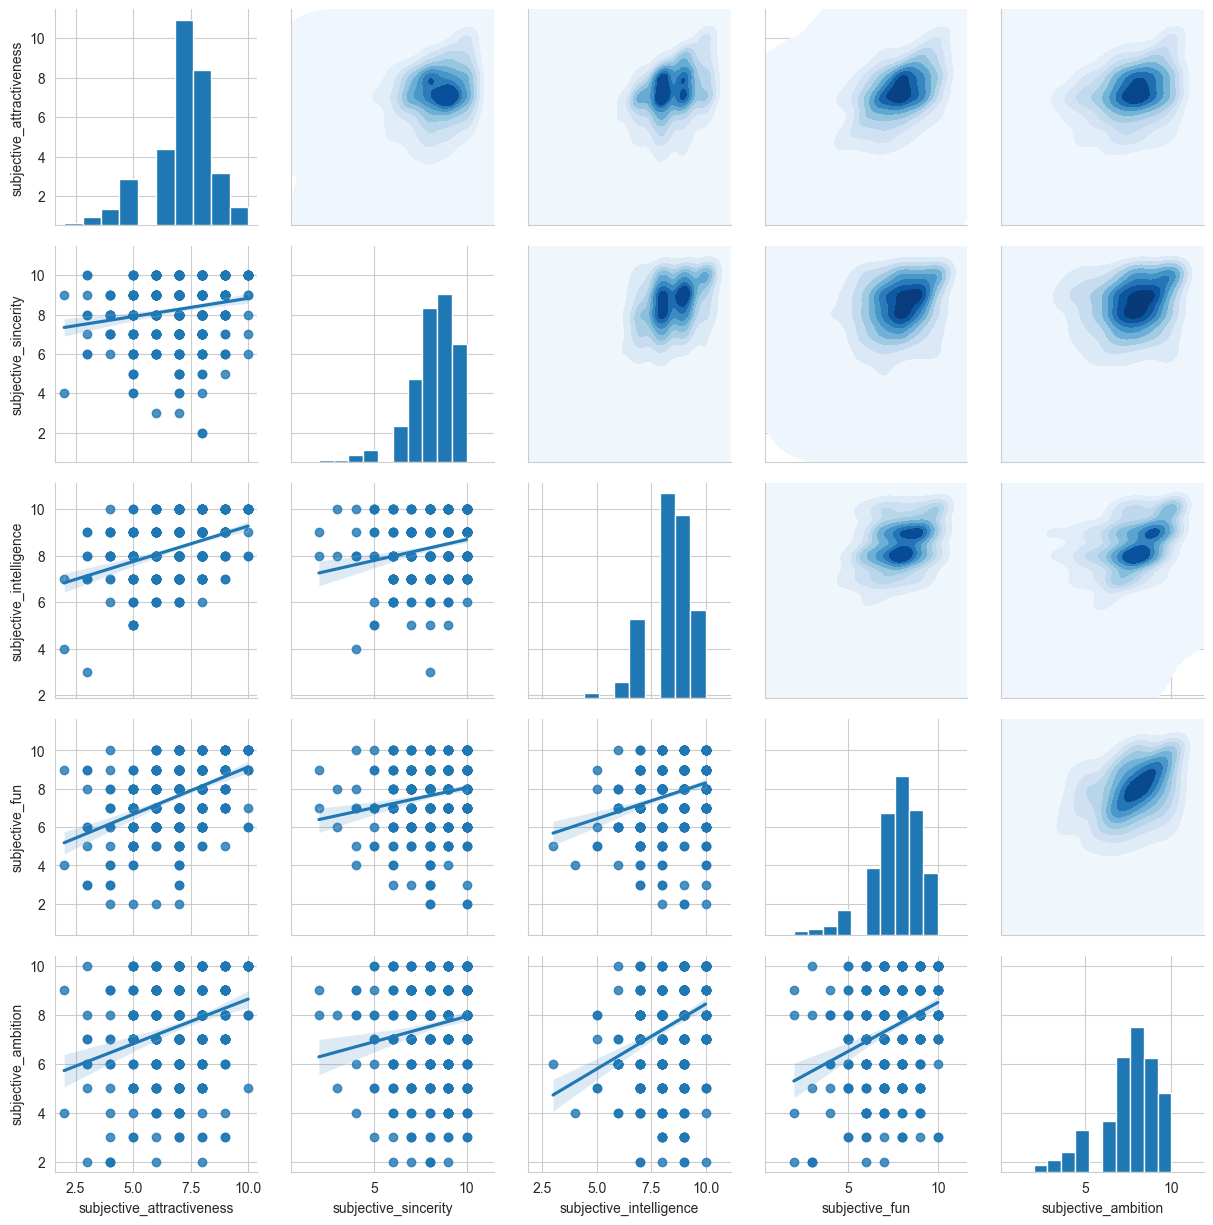

In [13]:
# Plot without scaling
g = sns.PairGrid(sd[subjective_cols])
# Regression plots in lower triangle
g = g.map_lower(sns.regplot) 
g = g.map_upper(sns.kdeplot, cmap="Blues", shade=True, thresh=False)  # KDE plots in upper triangle
g = g.map_diag(plt.hist) # Histograms along diagonal

plt.show()

**3.C) Use a heat map to visualize correlation.**

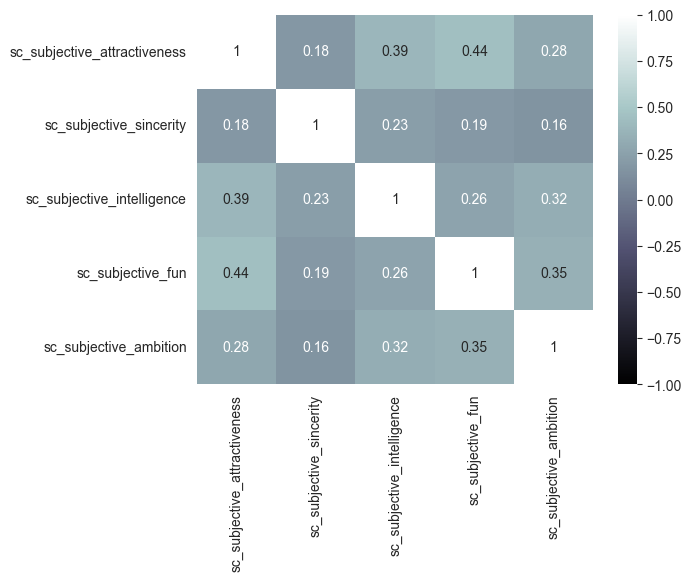

In [14]:
sns.heatmap(sd_scale.corr(), annot=True, cmap='bone', vmin=-1, vmax=1);

## There are no strong correlation between each subjective.
## But among all of subjective columns, 'fun' and 'attractiveness' are the most correlated.
## They seem make sense that a person who think themself fun will think that they are attractive as well.

---

**Important: Did you ensure the results make sense intuitively?** If not, look at the results again. You should **always** interpret your results and ensure they make sense based on what you expected. If they don’t, investigate why — sometimes your analysis or data are wrong.

> For example, the results show that believing you are attractive and fun are correlated. Would you expect that believing you are intellectual and fun to have a higher or lower correlation? What do the results say?

---


### 4) Visualize some preference columns.

Next, we’ll explore how some preference ratings are correlated. You saw an example — now try it on the `preference_cols` below.

- Find the z scores of each column in `preference_cols`.
- Visualize correlation using PairGrid.
- Visualize correlation using a heat map.
- Do these results make sense intuitively? 

In [15]:
preference_cols = ['like_tvsports', 'like_sports', 'like_museums', 
                   'like_theater', 'like_shopping']

sc_preference_cols = [f'sc_{col}' for col in preference_cols]

sd_like = sd[preference_cols]

**4.A) Find the z scores of each column in `preference_cols`.**

In [16]:
# Initiate StandardScaler Object
sc = StandardScaler()

# Fit transform
sd_like_scale = pd.DataFrame(sc.fit_transform(sd_like),
                        columns=sc_preference_cols)

In [17]:
# Check the result
sd_like_scale.head()

,sc_like_tvsports,sc_like_sports,sc_like_museums,sc_like_theater,sc_like_shopping
0,-0.912780,0.992539,-2.935051,-2.560869,0.913254
1,-0.912780,-1.291776,0.497620,0.985579,-1.000836
2,1.230441,-1.291776,-0.973525,0.098967,0.913254
3,-1.269983,-2.053215,-0.483143,0.985579,-1.766472
4,-0.198373,0.231101,-0.483143,-0.344339,0.913254


**4.B) Visualize correlation using PairGrid.**

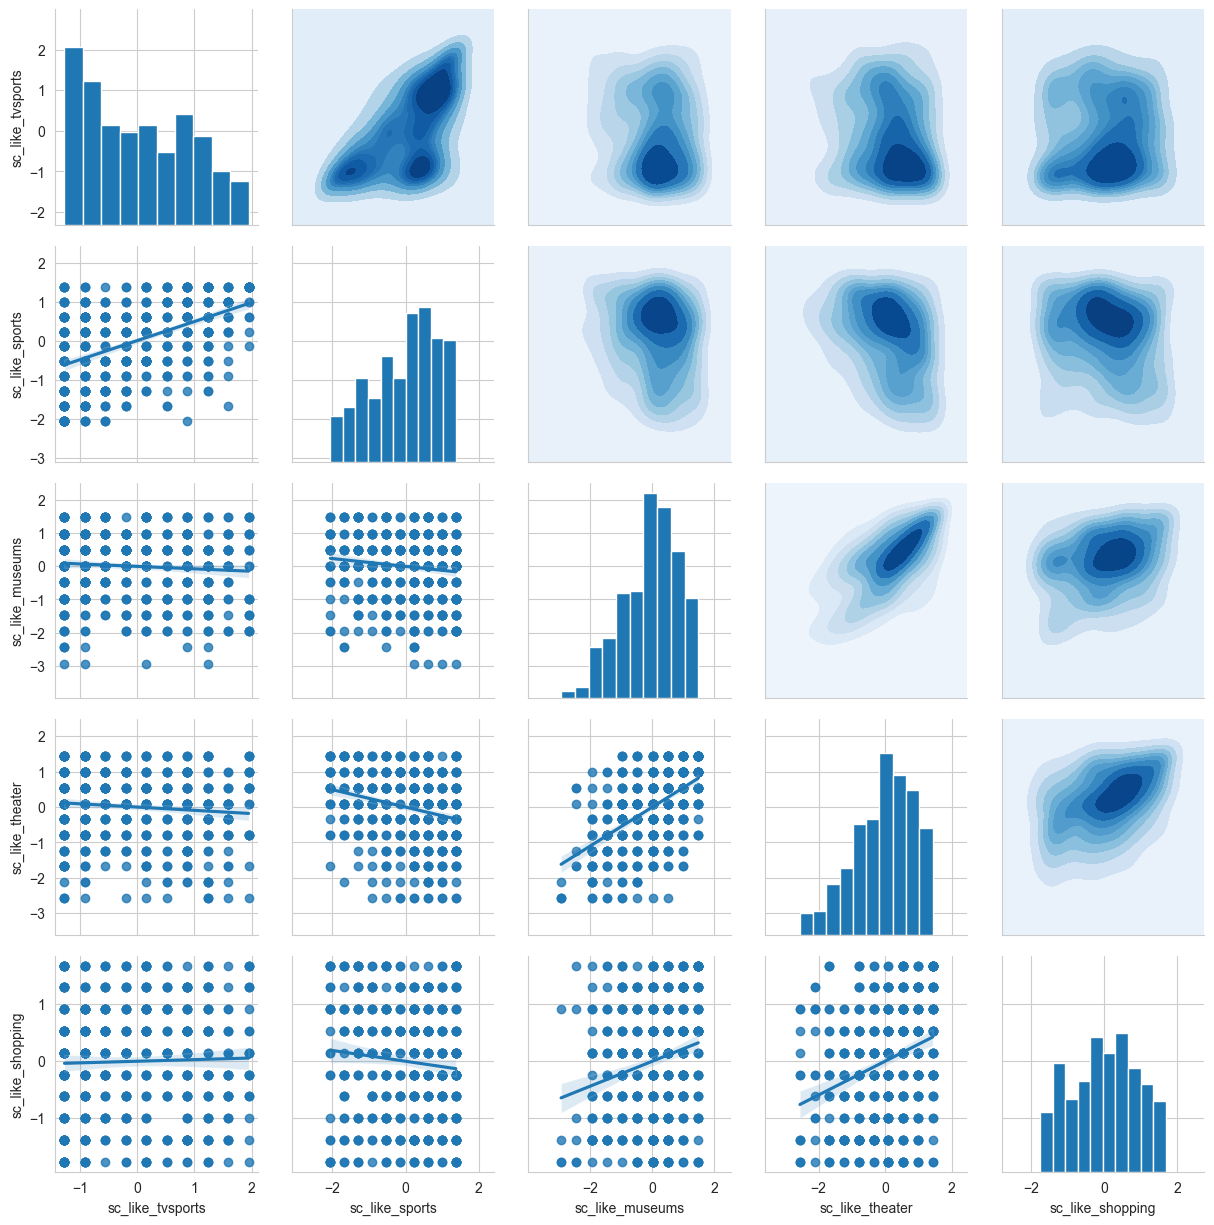

In [18]:
# Plot with scaling
g = sns.PairGrid(sd_like_scale)
# Regression plots in lower triangle
g = g.map_lower(sns.regplot) 
g = g.map_upper(sns.kdeplot, cmap="Blues", shade=True, thresh=False)  # KDE plots in upper triangle
g = g.map_diag(plt.hist) # Histograms along diagonal

plt.show()

**4.C) Visualize correlation using a heat map.**

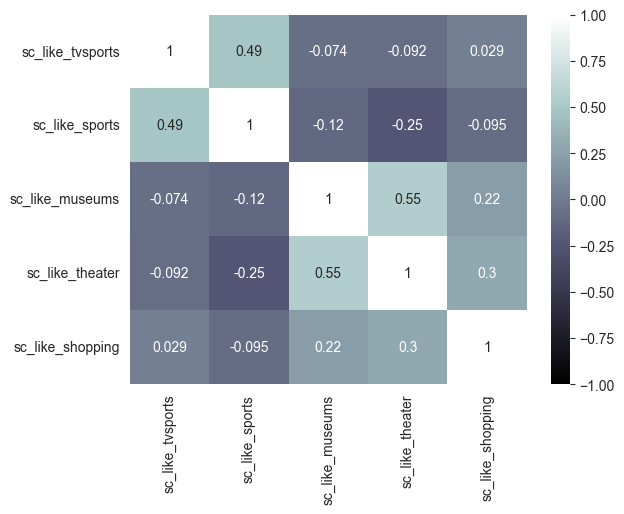

In [19]:
sns.heatmap(sd_like_scale.corr(), annot=True, cmap='bone', vmin=-1, vmax=1);

In [20]:
# From the result, there are no strong correlation of each preference.
# But if we look at top 2 correlated preferences, it will show that

# 1. 'theater' and 'museums' are the most correlated preferences.
## It makes sense that a person who likes to go to theater, which is about art,
## tends to like museums as well.

# 2. Correlation of sport and tvsports at 0.49 correlation logically makes sense.

---

### 5) Example: Fit PCA on the subjective ratings.

In [21]:
subjective_pca = PCA(n_components=5)
subjective_pca.fit(sd_scale.values)

PCA(n_components=5)

In [22]:
sd_scale.head()

,sc_subjective_attractiveness,sc_subjective_sincerity,sc_subjective_intelligence,sc_subjective_fun,sc_subjective_ambition
0,-0.786472,-0.202716,-0.354194,0.193323,-0.323589
1,-0.066425,-2.329267,-0.354194,1.486916,-2.564932
2,0.653622,0.506135,0.564338,0.193323,0.236747
3,-0.066425,-0.202716,-1.272726,0.840119,0.236747
4,-0.786472,-3.746968,1.482870,-1.100270,0.236747


---

**5.A) Look at the weights of the principal components.**

The principal components (or eigenvectors!) are simply the weights or coefficients on the original variables $X$ that transforms them to $Z$.

In [23]:
subjective_pca.components_

array([[-0.50189394, -0.31528977, -0.46707122, -0.48386412, -0.44318711],
       [ 0.21825979, -0.90905995, -0.09768977,  0.27400972,  0.20334221],
       [-0.40202351, -0.14438615,  0.42289342, -0.48141404,  0.63791176],
       [ 0.34811874, -0.21377638,  0.64842003, -0.36104737, -0.53132783],
       [-0.64626278, -0.08749096,  0.41594928,  0.57330577, -0.27017855]])

In [24]:
# Self note:
# The model components funcion shows
# Z1 - Z5 weights

---

**5.B) Look at the explained variance values (aka eigenvalues) and the explained variance ratios.**

The eigenvalues are ordered such that the first components have the largest eigenvalues. The values and their normalized equivalent in the explained variance ratio attribute tell you how much of the variance in the original data is encapsulated in the new component variables.

In [109]:
# Pull the eigenvalue
print(f'Eigenvalues:\n{subjective_pca.explained_variance_.round(3)}')

# Pull the explained variance attribute
var_exp = subjective_pca.explained_variance_ratio_
print(f'Explained varince:\n{var_exp.round(3)}')

# Generate the cumulative explained variance
cum_var_exp = np.cumsum(var_exp)
print(f'Cumulative explained variance:\n{cum_var_exp.round(3)}')
## 4 out of 5 components give 90% of the variability in the data.

Eigenvalues:
[2.16  0.889 0.738 0.722 0.499]
Explained varince:
[0.431 0.178 0.147 0.144 0.1  ]
Cumulative explained variance:
[0.431 0.609 0.756 0.9   1.   ]


---

**5.C) Transform the subjective data into the principal component space.**

The `transform()` function in the PCA will create your new component variable matrix.

In [26]:
subjective_pca.transform(sd_scale.values)

array([[ 0.673942  ,  0.03439955, -0.10382612, -0.35798348,  0.57693667],
       [ 1.35044583,  2.02341707, -2.13879048,  1.07112465,  1.64483811],
       [-0.94967947, -0.27146457, -0.03924025,  0.28967741, -0.18508884],
       ...,
       [ 1.27802939,  0.74844718, -0.36801805, -0.31785638, -0.5792599 ],
       [ 2.37402987, -0.92246551,  0.44869284,  1.6557433 , -1.43968236],
       [ 1.22960363,  0.72837603, -0.34611708,  0.16632973, -1.41541178]])

This transformed our five-dimensional data set into vectors along its five principal components (with zero loss).
- Using these, we can now reduce the dimensionality of our data while minimizing loss.
- For example, taking only the first three eigenvectors accounts for `0.431 + 0.178 + 0.147 = 75.6%` of the variance.

In [108]:
print(f'Cumulative explained variance:\n{cum_var_exp.round(3)}')
## 4 out of 5 components give 90% of the variability in the data.

Cumulative explained variance:
[0.431 0.609 0.756 0.9   1.   ]


---

**5.D) PCA-transformed features are not correlated.**

- Keep in mind that each column in the transformed data is no longer correlated.
- Compare this to the exploration above where many columns were correlated.

In [45]:
# Create new dataframe of new components
subjective_components = pd.DataFrame(subjective_pca.transform(sd_scale.values), 
             columns=['z1', 'z2', 'z3', 'z4', 'z5'])

subjective_components.head()

,z1,z2,z3,z4,z5
0,0.673942,0.034400,-0.103826,-0.357983,0.576937
1,1.350446,2.023417,-2.138790,1.071125,1.644838
2,-0.949679,-0.271465,-0.039240,0.289677,-0.185089
3,0.180279,0.572457,-0.735675,-1.234162,-0.051044
4,1.310959,2.836358,2.164996,1.760209,0.758137


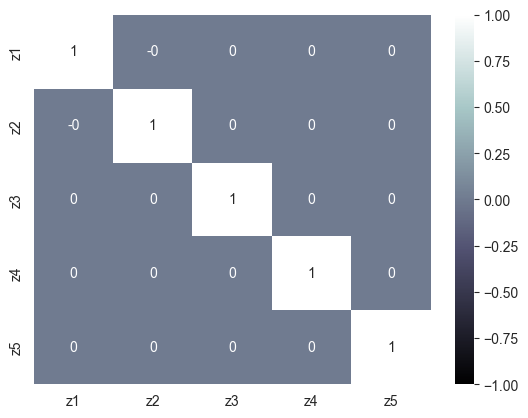

In [49]:
# Check correlation for new components
sns.heatmap(subjective_components.corr().round(6), annot=True, cmap='bone', vmin=-1, vmax=1);

## Now correlation of new components are not correlated.

---

### 6) Optional: How were the data transformed?

To demonstrate how the new principal component matrix is created from the original variable columns and the eigenvector weighting matrix, we'll create the first component (PC1) manually.

**6.A) Pull out the eigenvector for PC1.**

In [70]:
pc1_weights = subjective_pca.components_[0]
pc1_weights

array([-0.50189394, -0.31528977, -0.46707122, -0.48386412, -0.44318711])

**6.B) Create a DataFrame showing the original values for the subjective variables for `person1`.**

In [75]:
person1 = pd.DataFrame(sd_scale.iloc[0]).reset_index()
person1.columns = ['subjec_name', 'og_subject']
person1

,subjec_name,og_subject
0,sc_subjective_attractiveness,-0.786472
1,sc_subjective_sincerity,-0.202716
2,sc_subjective_intelligence,-0.354194
3,sc_subjective_fun,0.193323
4,sc_subjective_ambition,-0.323589


**6.C) Add the eigenvector for PC1: the weights by which to multiply each original variable.**

Recall that each component is a linear combination of the original variables, multiplied by a "weight" defined in the eigenvector of that component.

In [77]:
person1['eigenvector'] = pc1_weights
person1

,subjec_name,og_subject,eigenvector
0,sc_subjective_attractiveness,-0.786472,-0.501894
1,sc_subjective_sincerity,-0.202716,-0.315290
2,sc_subjective_intelligence,-0.354194,-0.467071
3,sc_subjective_fun,0.193323,-0.483864
4,sc_subjective_ambition,-0.323589,-0.443187


**6.D) Multiply the original variable values by the eigenvector values.**

These are the "pieces" of PC1 that will be added together to create the new value for that person.

In [78]:
person1['weight_subject'] = person1['og_subject'] * person1['eigenvector']
person1

,subjec_name,og_subject,eigenvector,weight_subject
0,sc_subjective_attractiveness,-0.786472,-0.501894,0.394726
1,sc_subjective_sincerity,-0.202716,-0.315290,0.063914
2,sc_subjective_intelligence,-0.354194,-0.467071,0.165434
3,sc_subjective_fun,0.193323,-0.483864,-0.093542
4,sc_subjective_ambition,-0.323589,-0.443187,0.143410


**6.E) Sum the original values multiplied by the eigenvector weights to get `person1`’s value for PC1.**

In [79]:
person1['weight_subject'].sum()

0.6739420008503668

In [82]:
# Check the answer with transformation funciton
subjective_components.iloc[0]

z1    0.673942
z2    0.034400
z3   -0.103826
z4   -0.357983
z5    0.576937
Name: 0, dtype: float64

In [ ]:
## The result of manual calculation and transformation function is the same.

---

### 7) Fit PCA on the preference data.

Now that you've seen how it's done, try it yourself!

- Find PCA eigenvalues and eigenvectors for the five `sd_like` columns.
- Transform the original `sd_like` columns into the principal component space.
- Verify that these columns are uncorrelated.

In [89]:
sd_like.head()

,like_tvsports,like_sports,like_museums,like_theater,like_shopping
0,2.0,9.0,1.0,1.0,8.0
1,2.0,3.0,8.0,9.0,3.0
2,8.0,3.0,5.0,7.0,8.0
3,1.0,1.0,6.0,9.0,1.0
4,4.0,7.0,6.0,6.0,8.0


In [88]:
sd_like_scale.head()

,sc_like_tvsports,sc_like_sports,sc_like_museums,sc_like_theater,sc_like_shopping
0,-0.912780,0.992539,-2.935051,-2.560869,0.913254
1,-0.912780,-1.291776,0.497620,0.985579,-1.000836
2,1.230441,-1.291776,-0.973525,0.098967,0.913254
3,-1.269983,-2.053215,-0.483143,0.985579,-1.766472
4,-0.198373,0.231101,-0.483143,-0.344339,0.913254


In [92]:
# Innitiate PCA
like_pca = PCA()

# Fit model
like_pca.fit(sd_like_scale.values)

PCA()

#### 7.A) Find PCA eigenvalues and eigenvectors for the five `sd_like` columns.

In [103]:
# Find PCA eigenvectors
like_pca.components_.round(4)

array([[ 0.3208,  0.4307, -0.5133, -0.5731, -0.346 ],
       [ 0.6499,  0.5322,  0.3241,  0.2651,  0.345 ],
       [ 0.    , -0.1603, -0.4549, -0.2242,  0.8468],
       [ 0.6225, -0.5875, -0.3382,  0.3334, -0.2047],
       [ 0.2954, -0.4006,  0.5569, -0.6632,  0.0477]])

In [110]:
# Find PCA eigenvalues

# Pull the eigenvalue
print(f'Eigenvalues:\n{like_pca.explained_variance_.round(3)}')

# Pull the explained variance attribute
var_exp = like_pca.explained_variance_ratio_
print(f'Explained varince:\n{var_exp.round(3)}')

# Generate the cumulative explained variance
cum_var_exp = np.cumsum(var_exp)
print(f'Cumulative explained variance:\n{cum_var_exp.round(3)}')


Eigenvalues:
[1.912 1.344 0.823 0.521 0.41 ]
Explained varince:
[0.382 0.268 0.164 0.104 0.082]
Cumulative explained variance:
[0.382 0.65  0.814 0.918 1.   ]


#### 7.B) Transform the original `sd_like` columns into the principal component space.

In [115]:
like_components = pd.DataFrame(like_pca.transform(sd_like_scale.values), 
             columns=['z1', 'z2', 'z3', 'z4', 'z5'])

like_components.head()

,z1,z2,z3,z4,z5
0,2.792967,-1.380042,2.523584,-1.199139,-0.559745
1,-1.323137,-1.203502,-1.087806,0.555816,-0.176508
2,-0.034641,0.138008,1.401136,1.700147,0.316730
3,-0.997338,-2.422960,-1.167939,1.269231,-0.559747
4,0.165285,0.061299,1.033292,-0.397532,-0.148281


#### 7.C) Verify that these columns are uncorrelated.

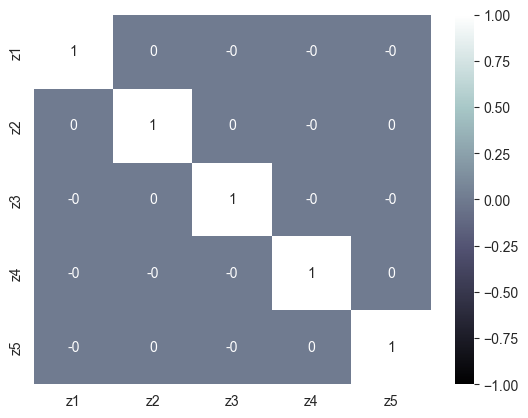

In [117]:
# Check correlation for new components
sns.heatmap(like_components.corr().round(6), annot=True, cmap='bone', vmin=-1, vmax=1);

## Now correlation of new components are not correlated.

---

### 8) Use PCA for dimensionality reduction.

Using linear regression, let's predict whether or not a user likes reading.

**The key question:** Can we get the same prediction accuracy using only the first three principal components as features versus using all five original values as features?

In [118]:
reading = sd['like_reading'].values

**8.A) Linear regression cross-validated on original variables (`sd_like.values`).**

- What is the mean cross-validation score?
- Keep in mind that linear regression uses $R^2$ for score, so one is the ideal score.

In [129]:
# Define X, y
X = sd_like
y = reading

# Split train test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Check split test
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((406, 5), (136, 5), (406,), (136,))

In [131]:
# Modeling
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [148]:
print(f'Train score: {lr.score(X_train, y_train).round(2)}')
print(f'Mean cross validation score: \
{cross_val_score(lr, X_train, y_train).mean().round(2)}')
print(f'Test score: {lr.score(X_test, y_test).round(2)}')

## The scores of train, test, and cross validation are low.

Train score: 0.18
Mean cross validation score: 0.13
Test score: 0.07


**8.B) Linear regression on the first principal component.**

- What is the mean cross-validation score?

In [152]:
# Define X, y
X = like_components[['z1']]
y = reading

# Split train test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Check split test
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# Modeling
lr = LinearRegression()
lr.fit(X_train, y_train)

print(f'Train score: {lr.score(X_train, y_train).round(2)}')
print(f'Mean cross validation score: \
{cross_val_score(lr, X_train, y_train).mean().round(2)}')
print(f'Test score: {lr.score(X_test, y_test).round(2)}')

Train score: 0.1
Mean cross validation score: 0.09
Test score: 0.09


**8.C) Linear regression on first three principal components.**

- What is the mean cross-validation score?

In [154]:
# Define X, y
X = like_components[['z1', 'z2', 'z3']]
y = reading

# Split train test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Check split test
X_train.shape, X_test.shape, y_train.shape, y_test.shape

# Modeling
lr = LinearRegression()
lr.fit(X_train, y_train)

print(f'Train score: {lr.score(X_train, y_train).round(2)}')
print(f'Mean cross validation score: \
{cross_val_score(lr, X_train, y_train).mean().round(2)}')
print(f'Test score: {lr.score(X_test, y_test).round(2)}')

Train score: 0.16
Mean cross validation score: 0.14
Test score: 0.1


---

**Check yourself**. The mean cross-validation score should be nearly the same for the first three principal components as it was on the original five-component data.